# The Cancer Gene Atlas Cancer (TCGA) - Testicular Germ Cell Tumors (TGCT)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
pandas 0.22.0
clustergrammer_widget 1.9.0
seaborn 0.8.1
Fri May 11 13:57:35 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Testicular Germ Cell Tumors [TGCT]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2G-AAH8,7936,TGCT,TCGA,6DFEA807-028D-4EE3-991A-6C2607A8C8DF,2G,45.0,NaN,430,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2G-AAHN,7937,TGCT,TCGA,C8744498-5D0E-4090-A6F1-C84AA6BB2BCB,2G,32.0,NaN,430,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2G-AAHP,7938,TGCT,TCGA,D7D793F6-EAEA-4DD3-8237-C2C02B042340,2G,31.0,NaN,430,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2G-AAF6,7939,TGCT,TCGA,E03C99F2-93CB-457F-8A77-D600F292E313,2G,28.0,NaN,430,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2G-AAFG,7940,TGCT,TCGA,630C683D-D1A2-4BEC-AA20-38EF59227D97,2G,30.0,NaN,430,Nationwide Children's Hospital,M0,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(134, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_TGCT_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,dde091a8-e459-470a-b299-2784017a7e53,d2f5792b-2c27-46bb-870c-d21b2ab0d189,b9e9b177-90db-4cdc-985e-d4413c08c2f5,24410bda-a687-4627-b15b-0bb621c02995,86ba323c-19bb-4397-af2c-4037fd5310b1,a47ed6a2-c817-416b-8c64-0cdbcdd5eb48,2f6845be-dfe2-49c6-b7e8-54d084042928,8397d31a-2aa6-4045-9cd4-36395b71cb72,97c947e2-c840-49e1-9d15-0c259dfe8d9a,77a9a2fe-954a-4238-a78c-3e5d2bea9237,...,9fb364a1-d2a0-4030-8e6a-31761c2eb559,defab014-d925-4347-a73b-741b00b946b5,76b0f487-c656-4b11-af9c-112334bdaea2,6b7550a7-ed9c-4491-82d2-c553a5636e7b,54c4c8f4-ec93-490b-89eb-ee85827ef197,c47f9d75-8336-4f26-8010-1290e90736a0,24909548-0312-4229-8f08-c42058e70919,d91ea2d5-59c5-44f0-84ef-1282e9cc4104,f44cac74-2ba4-478d-a73c-5f0156703fa0,e0b67b69-2a84-4556-a1b8-3c99c8f79b89
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,113.78600,226.83500,240.79500,206.44600,201.077000,169.519000,213.490000,195.60400,131.99000,274.09300,...,234.414000,201.11500,270.799000,327.89000,207.48000,218.36800,166.25800,135.150000,186.097000,211.328000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,2.79925,4.50254,64.95150,42.68700,103.096000,75.775600,37.577600,98.07660,44.79740,11.12830,...,46.329400,81.48510,77.928900,96.78280,34.76700,165.33100,75.04490,0.493238,47.039800,77.455300
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,8.65357,6.90101,4.79098,8.50379,16.382800,6.199420,19.134200,18.71170,5.73836,5.98345,...,9.302730,11.64310,8.124200,5.31192,10.62630,4.93916,5.15277,3.611790,6.638860,10.652900
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,39.57650,100.63200,86.06340,77.96450,65.445400,264.041000,250.243000,91.96070,142.39900,53.48830,...,165.064000,42.10500,94.817100,393.78500,32.55050,320.15000,152.21000,67.921500,49.728700,113.354000
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.00000,0.00000,9.82145,7.35665,0.372788,0.181379,0.127305,0.16418,2.07773,0.00000,...,0.286105,1.66176,0.289673,0.00000,0.38987,0.00000,3.99367,2.390410,0.491728,0.335547


In [19]:
matrix.shape

(199169, 156)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,dde091a8-e459-470a-b299-2784017a7e53,d2f5792b-2c27-46bb-870c-d21b2ab0d189,b9e9b177-90db-4cdc-985e-d4413c08c2f5,24410bda-a687-4627-b15b-0bb621c02995,86ba323c-19bb-4397-af2c-4037fd5310b1,a47ed6a2-c817-416b-8c64-0cdbcdd5eb48,2f6845be-dfe2-49c6-b7e8-54d084042928,8397d31a-2aa6-4045-9cd4-36395b71cb72,97c947e2-c840-49e1-9d15-0c259dfe8d9a,77a9a2fe-954a-4238-a78c-3e5d2bea9237,...,9fb364a1-d2a0-4030-8e6a-31761c2eb559,defab014-d925-4347-a73b-741b00b946b5,76b0f487-c656-4b11-af9c-112334bdaea2,6b7550a7-ed9c-4491-82d2-c553a5636e7b,54c4c8f4-ec93-490b-89eb-ee85827ef197,c47f9d75-8336-4f26-8010-1290e90736a0,24909548-0312-4229-8f08-c42058e70919,d91ea2d5-59c5-44f0-84ef-1282e9cc4104,f44cac74-2ba4-478d-a73c-5f0156703fa0,e0b67b69-2a84-4556-a1b8-3c99c8f79b89
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,113.78600,226.83500,240.79500,206.44600,201.077000,169.519000,213.490000,195.60400,131.99000,274.09300,...,234.414000,201.11500,270.799000,327.89000,207.48000,218.36800,166.25800,135.150000,186.097000,211.328000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,2.79925,4.50254,64.95150,42.68700,103.096000,75.775600,37.577600,98.07660,44.79740,11.12830,...,46.329400,81.48510,77.928900,96.78280,34.76700,165.33100,75.04490,0.493238,47.039800,77.455300
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,8.65357,6.90101,4.79098,8.50379,16.382800,6.199420,19.134200,18.71170,5.73836,5.98345,...,9.302730,11.64310,8.124200,5.31192,10.62630,4.93916,5.15277,3.611790,6.638860,10.652900
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,39.57650,100.63200,86.06340,77.96450,65.445400,264.041000,250.243000,91.96070,142.39900,53.48830,...,165.064000,42.10500,94.817100,393.78500,32.55050,320.15000,152.21000,67.921500,49.728700,113.354000
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.00000,0.00000,9.82145,7.35665,0.372788,0.181379,0.127305,0.16418,2.07773,0.00000,...,0.286105,1.66176,0.289673,0.00000,0.38987,0.00000,3.99367,2.390410,0.491728,0.335547


In [22]:
matrix.shape

(79930, 156)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-ZM-AA0F-01,TCGA-ZM-AA0B-01,TCGA-SN-A84W-01,TCGA-XE-AANI-01,TCGA-VF-A8AB-01,TCGA-SN-A6IS-01,TCGA-VF-A8AD-01,TCGA-YU-A94I-01,TCGA-YU-A94D-01,TCGA-ZM-AA0D-01,...,TCGA-2G-AAHP-05,TCGA-W4-A7U3-01,TCGA-2G-AAKO-01,TCGA-2G-AAH8-01,TCGA-2G-AALZ-01,TCGA-2G-AAF4-01,TCGA-2G-AAGX-01,TCGA-2G-AAFJ-01,TCGA-4K-AA1H-01,TCGA-2G-AALR-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,113.78600,226.83500,240.79500,206.44600,201.077000,169.519000,213.490000,195.60400,131.99000,274.09300,...,234.414000,201.11500,270.799000,327.89000,207.48000,218.36800,166.25800,135.150000,186.097000,211.328000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,2.79925,4.50254,64.95150,42.68700,103.096000,75.775600,37.577600,98.07660,44.79740,11.12830,...,46.329400,81.48510,77.928900,96.78280,34.76700,165.33100,75.04490,0.493238,47.039800,77.455300
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,8.65357,6.90101,4.79098,8.50379,16.382800,6.199420,19.134200,18.71170,5.73836,5.98345,...,9.302730,11.64310,8.124200,5.31192,10.62630,4.93916,5.15277,3.611790,6.638860,10.652900
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,39.57650,100.63200,86.06340,77.96450,65.445400,264.041000,250.243000,91.96070,142.39900,53.48830,...,165.064000,42.10500,94.817100,393.78500,32.55050,320.15000,152.21000,67.921500,49.728700,113.354000
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.00000,0.00000,9.82145,7.35665,0.372788,0.181379,0.127305,0.16418,2.07773,0.00000,...,0.286105,1.66176,0.289673,0.00000,0.38987,0.00000,3.99367,2.390410,0.491728,0.335547


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-ZM-AA0F-01,TCGA-ZM-AA0B-01,TCGA-SN-A84W-01,TCGA-XE-AANI-01,TCGA-VF-A8AB-01,TCGA-SN-A6IS-01,TCGA-VF-A8AD-01,TCGA-YU-A94I-01,TCGA-YU-A94D-01,TCGA-ZM-AA0D-01,...,TCGA-2G-AAHP-05,TCGA-W4-A7U3-01,TCGA-2G-AAKO-01,TCGA-2G-AAH8-01,TCGA-2G-AALZ-01,TCGA-2G-AAF4-01,TCGA-2G-AAGX-01,TCGA-2G-AAFJ-01,TCGA-4K-AA1H-01,TCGA-2G-AALR-01
ARF5,113.78600,226.83500,240.79500,206.44600,201.077000,169.519000,213.490000,195.60400,131.99000,274.09300,...,234.414000,201.11500,270.799000,327.89000,207.48000,218.36800,166.25800,135.150000,186.097000,211.328000
M6PR,2.79925,4.50254,64.95150,42.68700,103.096000,75.775600,37.577600,98.07660,44.79740,11.12830,...,46.329400,81.48510,77.928900,96.78280,34.76700,165.33100,75.04490,0.493238,47.039800,77.455300
ESRRA,8.65357,6.90101,4.79098,8.50379,16.382800,6.199420,19.134200,18.71170,5.73836,5.98345,...,9.302730,11.64310,8.124200,5.31192,10.62630,4.93916,5.15277,3.611790,6.638860,10.652900
FKBP4,39.57650,100.63200,86.06340,77.96450,65.445400,264.041000,250.243000,91.96070,142.39900,53.48830,...,165.064000,42.10500,94.817100,393.78500,32.55050,320.15000,152.21000,67.921500,49.728700,113.354000
CYP26B1,0.00000,0.00000,9.82145,7.35665,0.372788,0.181379,0.127305,0.16418,2.07773,0.00000,...,0.286105,1.66176,0.289673,0.00000,0.38987,0.00000,3.99367,2.390410,0.491728,0.335547


# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


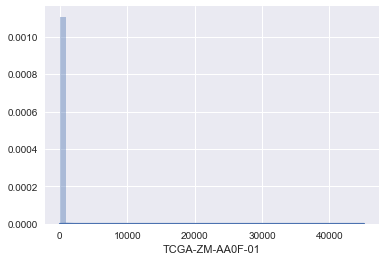

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


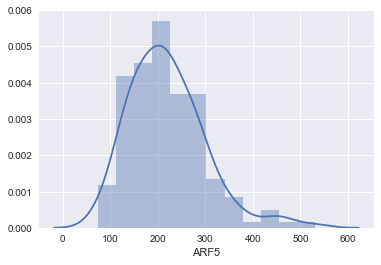

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_tgct_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining missing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-ZM-AA0F-01,TCGA-ZM-AA0B-01,TCGA-SN-A84W-01,TCGA-XE-AANI-01,TCGA-VF-A8AB-01,TCGA-SN-A6IS-01,TCGA-VF-A8AD-01,TCGA-YU-A94I-01,TCGA-YU-A94D-01,TCGA-ZM-AA0D-01,...,TCGA-2G-AAHP-05,TCGA-W4-A7U3-01,TCGA-2G-AAKO-01,TCGA-2G-AAH8-01,TCGA-2G-AALZ-01,TCGA-2G-AAF4-01,TCGA-2G-AAGX-01,TCGA-2G-AAFJ-01,TCGA-4K-AA1H-01,TCGA-2G-AALR-01
A1BG,0.085217,0.085217,0.085217,0.085217,0.085217,0.085217,0.085217,0.056384,0.085217,0.085217,...,0.085217,0.085217,0.085217,0.085217,0.107544,0.085217,0.085217,0.085217,0.085217,0.076812
A1CF,0.122151,0.010604,0.694699,0.121049,0.010741,0.020843,0.007913,7.119950,0.054239,0.004688,...,0.007443,1.169370,0.020854,0.015611,0.089758,0.018188,0.481422,0.709451,0.005650,1.366800
A2M,37.229100,17.049300,504.649000,291.028000,390.034000,258.066000,70.308000,119.435000,123.746000,51.339000,...,117.258000,462.077000,174.433000,141.663000,355.399000,98.866700,921.744000,297.933000,235.173000,172.155000
A2ML1,0.993927,0.946987,0.729091,0.489199,0.669762,4.367890,1.128770,0.278523,0.332184,1.515180,...,2.939060,0.593836,2.878230,3.198480,0.336757,2.068990,3.771500,1.710710,1.723240,0.108358
A3GALT2,0.051429,0.051429,0.051429,0.024176,0.051429,0.051429,0.051429,0.051429,0.108686,0.051429,...,0.051429,0.123450,0.051429,0.051429,0.051429,0.026689,0.096787,0.051429,0.051429,0.045218


In [34]:
normalized_matrix.shape

(19266, 156)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-ZM-AA0F-01,TCGA-ZM-AA0B-01,TCGA-SN-A84W-01,TCGA-XE-AANI-01,TCGA-VF-A8AB-01,TCGA-SN-A6IS-01,TCGA-VF-A8AD-01,TCGA-YU-A94I-01,TCGA-YU-A94D-01,TCGA-ZM-AA0D-01,...,TCGA-2G-AAHP-05,TCGA-W4-A7U3-01,TCGA-2G-AAKO-01,TCGA-2G-AAH8-01,TCGA-2G-AALZ-01,TCGA-2G-AAF4-01,TCGA-2G-AAGX-01,TCGA-2G-AAFJ-01,TCGA-4K-AA1H-01,TCGA-2G-AALR-01
A1BG,-0.823805,-0.837614,-0.860553,-0.828816,-0.884189,-0.791718,-0.853205,-1.041891,-0.846307,-0.828902,...,-0.847785,-0.808371,-0.792297,-0.873455,-0.754456,-0.853747,-0.861036,-0.786213,-0.790245,-0.918413
A1CF,-0.667435,-1.742680,0.050716,-0.676382,-1.783680,-1.403294,-1.885393,1.059431,-1.042524,-2.088479,...,-1.906586,0.329054,-1.403640,-1.610546,-0.832968,-1.524485,-0.109038,0.134182,-1.968717,0.331863
A2M,1.816550,1.463565,2.911909,2.704591,2.776386,2.689485,2.063272,2.284085,2.315696,1.951018,...,2.290830,2.925816,2.518804,2.347274,2.764674,2.210775,3.173046,2.757378,2.650615,2.432078
A2ML1,0.243022,0.208202,0.071701,-0.069858,0.011204,0.918026,0.268873,-0.348185,-0.255456,0.421035,...,0.689896,0.034768,0.736301,0.700961,-0.258726,0.531483,0.784950,0.516436,0.515573,-0.768981
A3GALT2,-1.043127,-1.056936,-1.079875,-1.375964,-1.103511,-1.011040,-1.072527,-1.081841,-0.740661,-1.048224,...,-1.067107,-0.647407,-1.011619,-1.092777,-1.074837,-1.357939,-0.805747,-1.005535,-1.009567,-1.148533


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-ZM-AA0F-01,TCGA-ZM-AA0B-01,TCGA-SN-A84W-01,TCGA-XE-AANI-01,TCGA-VF-A8AB-01,TCGA-SN-A6IS-01,TCGA-VF-A8AD-01,TCGA-YU-A94I-01,TCGA-YU-A94D-01,TCGA-ZM-AA0D-01,...,TCGA-2G-AAHP-05,TCGA-W4-A7U3-01,TCGA-2G-AAKO-01,TCGA-2G-AAH8-01,TCGA-2G-AALZ-01,TCGA-2G-AAF4-01,TCGA-2G-AAGX-01,TCGA-2G-AAFJ-01,TCGA-4K-AA1H-01,TCGA-2G-AALR-01
A1BG,-0.731598,-0.685919,-1.013968,-1.041953,-0.697936,-0.841931,-0.774488,-1.030813,-0.906195,-0.799405,...,-0.841931,-0.938401,-0.874791,-0.735822,-0.815342,-0.856375,-1.055751,-1.150597,-0.823320,-0.995081
A1CF,-0.561702,-1.567025,-0.223730,-0.918494,-1.585764,-1.435106,-1.810876,0.933675,-1.109710,-2.051293,...,-1.898972,0.099011,-1.481809,-1.486032,-0.891900,-1.551129,-0.379966,-0.192756,-1.964535,0.166676
A2M,2.087285,1.629135,2.971568,2.725187,2.773351,2.708253,2.037890,2.251374,2.341148,2.029169,...,2.302479,2.896210,2.480971,2.327950,2.738403,2.194787,3.158849,2.829817,2.622867,2.396274
A2ML1,0.450335,0.418960,-0.204740,-0.406121,0.161342,0.839235,0.335228,-0.354472,-0.333349,0.489991,...,0.652916,-0.154322,0.573407,0.765059,-0.330850,0.481890,0.546808,0.229202,0.412347,-0.862800
A3GALT2,-0.965981,-0.911839,-1.200952,-1.542735,-0.920341,-1.053254,-0.992792,-1.068164,-0.802302,-1.023905,...,-1.063183,-0.789468,-1.087696,-0.973929,-1.132094,-1.386293,-1.007576,-1.351576,-1.049150,-1.200070


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-ZM-AA0F-01,TCGA-ZM-AA0B-01,TCGA-SN-A84W-01,TCGA-XE-AANI-01,TCGA-VF-A8AB-01,TCGA-SN-A6IS-01,TCGA-VF-A8AD-01,TCGA-YU-A94I-01,TCGA-YU-A94D-01,TCGA-ZM-AA0D-01,...,TCGA-2G-AAHP-05,TCGA-W4-A7U3-01,TCGA-2G-AAKO-01,TCGA-2G-AAH8-01,TCGA-2G-AALZ-01,TCGA-2G-AAF4-01,TCGA-2G-AAGX-01,TCGA-2G-AAFJ-01,TCGA-4K-AA1H-01,TCGA-2G-AALR-01
A1BG,1.006014,1.452662,-1.754955,-2.028585,1.335162,-0.072798,0.586646,-1.919665,-0.701160,0.343014,...,-0.072798,-1.016069,-0.394104,0.964717,0.187177,-0.214035,-2.163503,-3.090895,0.109173,-1.570280
A1CF,1.401820,-0.205399,1.942138,0.831413,-0.235356,0.005501,-0.595245,3.792492,0.525716,-0.979602,...,-0.736085,2.458107,-0.069163,-0.075915,0.873930,-0.179985,1.692364,1.991658,-0.840901,2.566284
A2M,-0.602513,-1.742950,1.598662,0.985365,1.105256,0.943213,-0.725468,-0.194060,0.029406,-0.747176,...,-0.066849,1.411077,0.377458,-0.003446,1.018261,-0.334916,2.064844,1.245811,0.730667,0.166627
A2ML1,-0.123793,-0.225916,-2.255957,-2.911422,-1.064420,1.142014,-0.498450,-2.743311,-2.674559,0.005280,...,0.535575,-2.091854,0.276786,0.900581,-2.666427,-0.021087,0.190211,-0.843546,-0.247438,-4.397838
A3GALT2,0.683205,1.126274,-1.239636,-4.036564,1.056695,-0.030977,0.463808,-0.152989,2.022649,0.209197,...,-0.112232,2.127677,-0.312823,0.618166,-0.676149,-2.756344,0.342822,-2.472248,0.002610,-1.232422


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19266, 156)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

(18834, 156)

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18742, 156)

# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


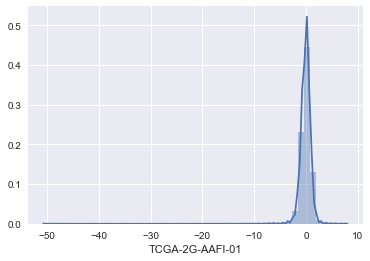

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


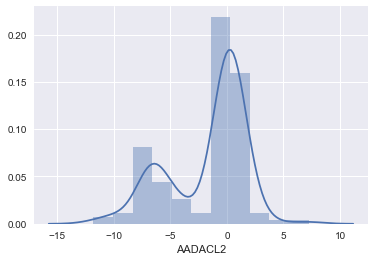

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_tgct_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18742, 2)

# Save Gene List

In [56]:
filename = path+'tcga_tgct_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-2G-AAEW-01,31,MALE,M0,N0,T1,IS,Seminoma; NOS,Primary Solid Tumor,Testes,NaN
TCGA-2G-AAEX-01,38,MALE,M0,N0,T1,IS,Seminoma; NOS,Primary Solid Tumor,Testes,NaN
TCGA-2G-AAF1-01,28,MALE,M0,N0,T1,IS,Seminoma; NOS,Primary Solid Tumor,Testes,NaN
TCGA-2G-AAF4-01,30,MALE,M0,N0,T1,Stage I,Seminoma; NOS,Primary Solid Tumor,Testes,NaN
TCGA-2G-AAF6-01,28,MALE,M0,N0,T1,IS,Seminoma; NOS,Primary Solid Tumor,Testes,NaN


In [60]:
attribute_list.shape

(156, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_tgct_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-2G-AAEW-01,TCGA-2G-AAEX-01,TCGA-2G-AAF1-01,TCGA-2G-AAF4-01,TCGA-2G-AAF6-01,TCGA-2G-AAF8-01,TCGA-2G-AAFE-01,TCGA-2G-AAFG-01,TCGA-2G-AAFG-05,TCGA-2G-AAFH-01,...,TCGA-YU-AA4L-01,TCGA-YU-AA61-01,TCGA-ZM-AA05-01,TCGA-ZM-AA06-01,TCGA-ZM-AA0B-01,TCGA-ZM-AA0D-01,TCGA-ZM-AA0E-01,TCGA-ZM-AA0F-01,TCGA-ZM-AA0H-01,TCGA-ZM-AA0N-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.307396,0.538280,-0.269373,-0.205317,0.769230,0.448454,-0.359093,0.538280,0.422819,0.435671,...,-0.833278,-0.846084,0.923266,0.782085,0.846221,0.281764,0.730707,0.692152,0.948972,0.871894
A1CF,-0.550789,-0.871166,-0.063754,-0.256025,-0.537970,-0.268841,-0.717411,-0.050953,-0.461093,-0.691778,...,0.949497,0.795391,-0.230409,0.013111,-0.294516,-0.922407,0.705570,0.423356,-0.614879,-0.525164
A2M,0.564118,0.615398,0.397375,-0.294817,-0.602365,-0.269154,-0.025650,-0.281965,-0.179450,0.243554,...,-0.845864,0.782308,-0.999434,0.205116,-0.948333,-0.589517,-0.397333,-0.448572,-0.256325,-0.807372
A2ML1,0.338641,0.492554,0.107906,-0.020243,-0.250944,0.184804,-0.353452,-0.532883,-0.622627,-0.276574,...,-0.904500,-0.866086,-0.443179,0.441265,-0.199683,0.018203,0.659234,-0.097186,-0.635404,-0.122785
A3GALT2,0.410123,0.499909,-0.230802,-0.769029,-0.576809,-0.756235,0.051178,0.589695,0.422960,0.269096,...,-0.294902,-0.525543,0.833558,0.705183,0.820726,0.205034,0.692288,0.615309,0.910560,0.769367


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

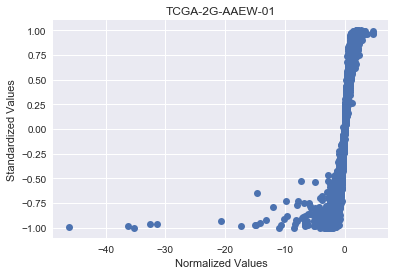

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_tgct_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-2G-AAEW-01,TCGA-2G-AAEX-01,TCGA-2G-AAF1-01,TCGA-2G-AAF4-01,TCGA-2G-AAF6-01,TCGA-2G-AAF8-01,TCGA-2G-AAFE-01,TCGA-2G-AAFG-01,TCGA-2G-AAFG-05,TCGA-2G-AAFH-01,...,TCGA-YU-AA4L-01,TCGA-YU-AA61-01,TCGA-ZM-AA05-01,TCGA-ZM-AA06-01,TCGA-ZM-AA0B-01,TCGA-ZM-AA0D-01,TCGA-ZM-AA0E-01,TCGA-ZM-AA0F-01,TCGA-ZM-AA0H-01,TCGA-ZM-AA0N-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_tgct_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_tgct_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_tgct_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_tgct_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_tgct_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-2G-AAEW, Age:31.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAEX, Age:38.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAF1, Age:28.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAF4, Age:30.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAF6, Age:28.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAF8, Age:33.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAFE, Age:37.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIA, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAFG, Age:30.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAFG, Age:30.0, Gender:MALE, SampleType:Additional - New Primary, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-2G-AAFH, Age:38.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIB, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)",...,"(Donor:TCGA-YU-AA4L, Age:27.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIC, Histology:Non-Seminoma; Embryonal Carcinoma, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-YU-AA61, Age:29.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Non-Seminoma; Yolk Sac Tumor, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA05, Age:36.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIC, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA06, Age:45.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA0B, Age:32.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA0D, Age:34.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA0E, Age:39.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA0F, Age:35.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IA, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA0H, Age:50.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)","(Donor:TCGA-ZM-AA0N, Age:44.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IB, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-2G-AAEW, Age:31.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)",1.000000,0.139634,0.439109,0.167504,0.171458,0.173004,0.240923,0.115198,0.054411,0.106194,...,-0.068983,-0.041794,-0.011331,-0.048337,-0.017533,0.108668,0.067939,0.051626,-0.020695,-0.038535
"(Donor:TCGA-2G-AAEX, Age:38.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)",0.139634,1.000000,0.094880,0.229692,0.143706,0.154868,0.131486,0.143519,0.139543,0.193913,...,0.003803,-0.035319,-0.045305,0.083976,0.108554,0.031728,0.063741,-0.028415,-0.026819,0.111697
"(Donor:TCGA-2G-AAF1, Age:28.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:IS, Histology:Seminoma; NOS, Tissue:Testes, Tumor:nan, Gradenan)",0.439109,0.094880,1.000000,0.191424,0.150793,0.1012

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_tgct_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

clustergrammer_widget(network='{"views": [{"N_row_sum": "all", "dist": "cos", "nodes": {"col_nodes": [{"cat-0"…

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.162340,-0.302650,0.081093,0.236220,0.148033,-0.140704,-0.045173,-0.140654,0.084597,...,0.102790,0.122062,-0.169418,-0.137326,-0.054403,0.230199,-0.177895,0.148365,-0.155275,-0.210325
A1CF,-0.162340,1.000000,0.119777,-0.451177,-0.163337,-0.506100,0.281533,-0.198176,-0.001729,0.030157,...,-0.445885,-0.082769,-0.253723,0.040140,-0.272295,-0.524322,-0.221283,-0.307905,-0.254116,-0.211815
A2M,-0.302650,0.119777,1.000000,-0.166495,-0.095323,-0.416040,0.205842,-0.212593,-0.072878,0.170118,...,-0.211124,-0.501195,0.234106,-0.186965,-0.173342,-0.536328,0.224445,0.114974,0.310896,0.192748
A2ML1,0.081093,-0.451177,-0.166495,1.000000,0.052442,0.538090,-0.228202,0.192286,0.227527,-0.082162,...,0.347908,0.075358,0.075126,0.079413,0.179253,0.536334,0.196754,0.186982,0.024989,0.187023
A3GALT2,0.236220,-0.163337,-0.095323,0.052442,1.000000,0.001494,-0.013548,0.012638,-0.154197,0.050589,...,0.060259,0.046357,0.019712,0.007030,0.061927,0.040817,-0.041242,0.017779,-0.068831,-0.101726


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_tgct_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_tgct_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  156 Out of 156   

 The number of statisticaly relevent gene-attribute associations is: 145048
